In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

1. Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

In [2]:
mu1 = 10
sigma1 = 5

mu2 = 15
sigma2 = 3

amount = 100

norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

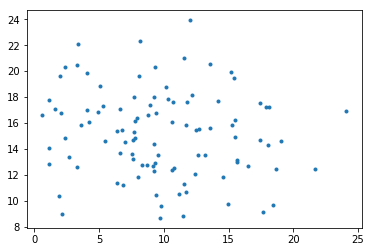

In [3]:
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
plt.scatter(x, y, marker='.')

2. Нарисовать плотность распределения полученной выборки x.

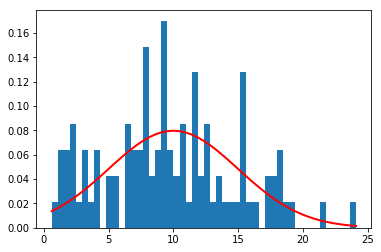

In [4]:
count, bins, ignored = plt.hist(x, 50, density=True)
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ), 
         linewidth=2, color='r')
plt.show()

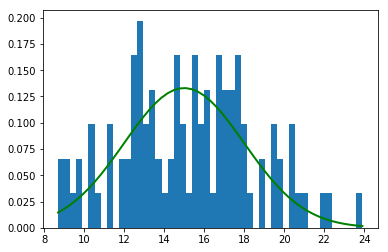

In [5]:
count, bins, ignored = plt.hist(y, 50, density=True)
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ), 
         linewidth=2, color='g')
plt.show()

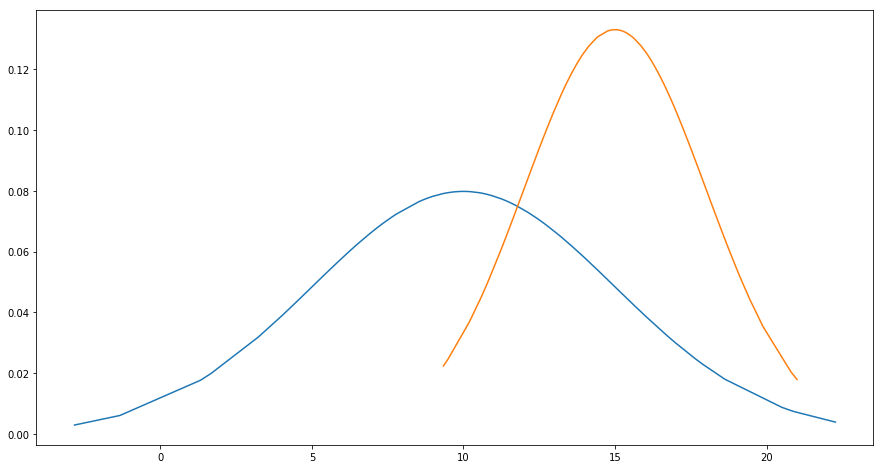

In [6]:
x1 = norm_rv1.rvs(size=amount)
y1 = norm_rv2.rvs(size=amount)

x1.sort()
y1.sort()

pdf1 = norm_rv1.pdf(x1)
pdf2 = norm_rv2.pdf(y1)

plt.figure(figsize=(15,8))
plt.plot(x1, pdf1)
plt.plot(y1, pdf2)

3. Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки.

In [7]:
X = np.vstack((x, y)).T

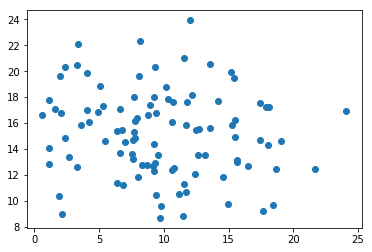

In [8]:
plt.scatter(X[:, 0], X[:, 1])

In [9]:
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)


def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])


cov_mat(X.T)

array([[26.86394939, -2.24927912],
       [-2.24927912, 10.97984485]])

array([[241.77554448, -20.24351212],
       [-20.24351212,  98.81860369]])

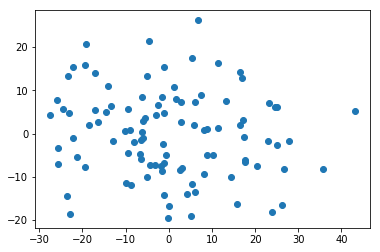

In [10]:
X = X - np.mean(X, 0)

sx, sy = 3, 3
Scale = np.array([[sx, 0], [0, sy]])

Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
cov_mat(Y.T)

In [11]:
x_new=Y[:,0]
y_new=Y[:,1]

4. Построить график зависимости (корелляции) x от y.

-0.1309665299188505


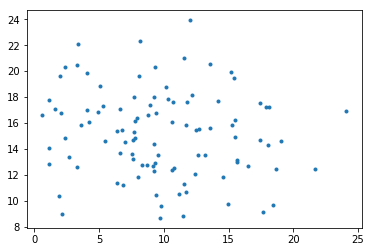

In [12]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print(corr)

In [14]:
#Похоже между этими двумя случайными выборками очень слабая обратная зависимость, но можно сказать, что ее практически нет.

5. Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x.

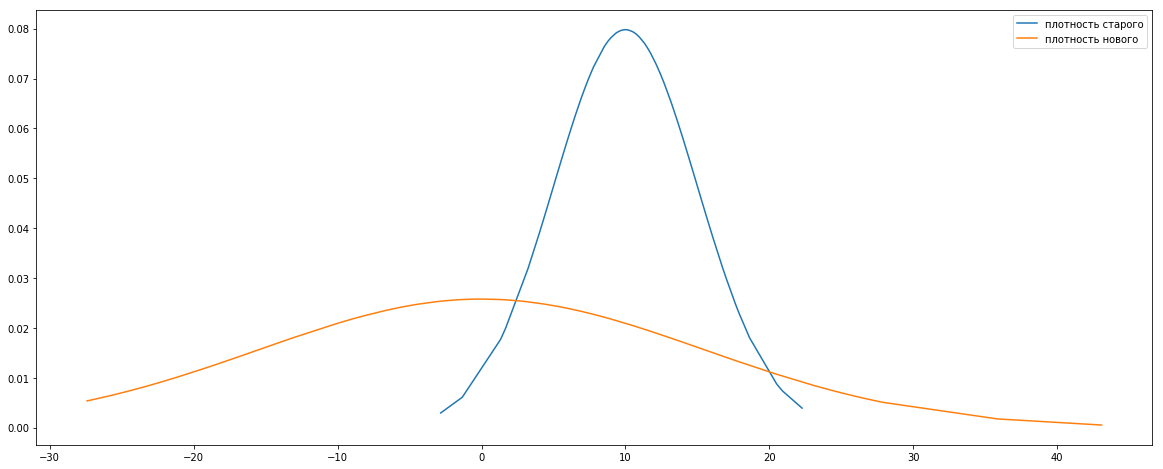

In [13]:
x_new_mean = np.mean(x_new)#новое среднее
x_new_std = np.std(x_new)#новое отклонение
x_new.sort()
pdf_new = sts.norm.pdf(x_new, x_new_mean, x_new_std)


plt.figure(figsize=(20,8))

plt.plot(x1, pdf1)
plt.plot(x_new, pdf_new)

plt.legend(['плотность старого',  'плотность нового'])

6. Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?

0.13208647902117093


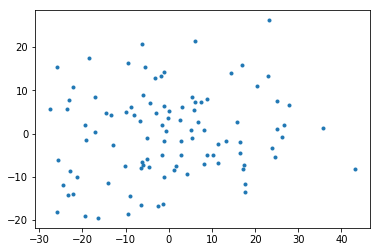

In [15]:
corr, p_value = pearsonr(x_new, y_new)
plt.scatter(x_new, y_new, marker='.')
print(corr)

In [17]:
#Корелляция после применения матрица масштабирования не изменилась, 
#видимо потому-что матрица была размером Scale = [[n, 0], [0, n], 
#то есть исходный разброс распределений увеличился равномерно. 

7. Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

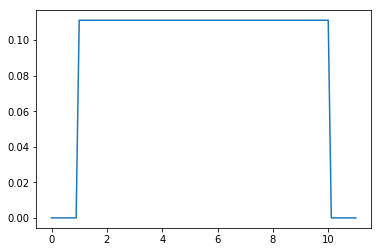

In [48]:
a=1
b=10
uniform_rv = sts.uniform(a, b-a)


x_a_b = np.linspace(0, 11, 100)
pdf_a_b = uniform_rv.pdf(x_a_b)
plt.plot(x_a_b, pdf_a_b)

In [20]:
#В отличии от нормального распределения, в равномерном распределении данные распределены равномерно 
#на протяжении заданного отрезка

8. Найти на графике примеры выброса. Что они означают?

In [49]:
#На графике 4 выброса, примерно [1,95], [40,81], [79,0], [85,10]. 
#Они обозначают, что в распределении были значения, которые сильно отличаются от остальных.

9. Найти корелляцию в следующих данных:

In [50]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [51]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


In [52]:
Total_number_of_avocados = df_norm[0]
Average_Price = df_norm[1]

-0.2083170484878848


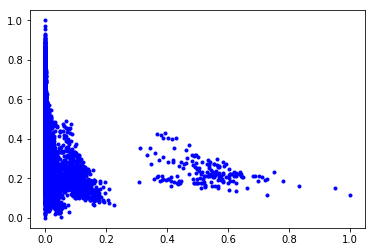

In [53]:
corr, p_value = pearsonr(Total_number_of_avocados, Average_Price)
print(corr)
plt.plot(Total_number_of_avocados, Average_Price, 'b.')

In [54]:
#Корелляция отрицательная, но не сильная. Получается, что чем больше количество авокадо, 
#тем ниже средняя цена. Может быть оно дорогое, и его продавали по несколько штук, но со скидкой за количество.
#Поэтому средняя цена снижалась. 
#А может быть обратная связь. Чем дешевле это авокадо стоило, тем больше его покупали. В любом случае корелляция покажет только
#наличие связи между значениями, но не покажет, какое из значений зависимое, а какое оказывает влияние.